In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import chi2_contingency
import collections
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm

In [ ]:
data = pd.read_csv("/content/survey_modified2.csv")

In [ ]:
data1 = data

In [ ]:
data1.loc[(data1['Study hours'] >4) &(data1['Study hours'] <7)& (data1['Online examination experience'] == 'Good')] #& (data1['Online learning content quality'] == 'Very Bad')&(data1['Internet connectivity issues'] == 'Very often') ]

,Unnamed: 0,Gender,Degree,Internet connectivity issues,Area,Lecture Modes,Online learning content quality,Class interaction with instructors,Personalized Interaction with instructors,Level of interaction with your batchmates?,Motivation,Work-life balance,Study environment,Stress levels,Online examination experience,Study hours,grades
0,1,Male,Undergraduate,Rarely,Urban,"Live Session, Recorded Videos, Doubt sessions",Very bad,Few,None,Low,1,1,Noisy,4,Good,5.0,8.9
27,28,Female,Postgraduate,Moderate,Urban,"Live Session, Recorded Videos, Doubt sessions",Good,Most,Most,Moderate,3,4,Quiet,3,Good,5.0,7.9
47,48,Male,Undergraduate,Never,Urban,"Live Session, Recorded Videos, Doubt sessions",Very bad,Most,Most,High,5,5,Quiet,1,Good,6.0,7.3
84,85,Male,Undergraduate,Very often,Rural,"Live Session, Recorded Videos, Doubt sessions",Good,Few,Few,Moderate,3,2,Noisy,3,Good,6.0,8.0
92,93,Female,Postgraduate,Moderate,Rural,"Live Session, Doubt sessions",Good,Most,Few,Low,4,4,Quiet,4,Good,5.0,8.6
98,99,Male,Undergraduate,Rarely,Urban,"Live Session, Recorded Videos",Good,Most,None,Low,2,3,Quiet,4,Good,6.0,8.1
125,126,Male,Undergraduate,Moderate,Urban,"Live Session, Recorded Videos, Doubt sessions",Moderate,Few,Few,Low,3,3,Noisy,4,Good,5.0,7.5
187,188,Male,Postgraduate,Moderate,Rural,"Recorded Videos, Doubt Session, Live Session",Good,Most,Few,Low,3,4,Quiet,1,Good,5.0,7.3
198,199,Female,Postgraduate,Moderate,Urban,Live Session,Moderate,Few,None,Low,3,4,Quiet,2,Good,5.0,7.5
210,211,Female,Postgraduate,Rarely,Urban,Live Session,Good,Most,Most,Moderate,5,5,Quiet,2,Good,6.0,7.2


In [ ]:
data1.head()

,Unnamed: 0,Gender,Degree,Internet connectivity issues,Area,Lecture Modes,Online learning content quality,Class interaction with instructors,Personalized Interaction with instructors,Level of interaction with your batchmates?,Motivation,Work-life balance,Study environment,Stress levels,Online examination experience,Study hours,grades
0,1,Male,Undergraduate,Rarely,Urban,"Live Session, Recorded Videos, Doubt sessions",Very bad,Few,None,Low,1,1,Noisy,4,Good,5.0,8.9
1,2,Male,Undergraduate,Moderate,Urban,"Live Session, Recorded Videos",Moderate,Most,Few,Moderate,2,2,Noisy,4,Bad,7.0,7.6
2,3,Female,Undergraduate,Rarely,Urban,"Live Session, Recorded Videos, Doubt sessions",Moderate,Few,Few,Low,2,3,Noisy,3,Moderate,6.0,8.1
3,4,Male,Undergraduate,Moderate,Rural,Live Session,Good,Most,Few,Low,2,2,Quiet,2,Bad,4.0,6.6
4,5,Male,Postgraduate,Rarely,Urban,Live Session,Moderate,Few,Few,Low,1,1,Noisy,2,Bad,2.0,6.9


In [ ]:
data1.describe()

,Unnamed: 0,Motivation,Work-life balance,Stress levels,Study hours,grades
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,112.000000,2.408072,2.515695,3.578475,6.116592,7.615695
std,64.518731,1.181436,1.146273,1.143680,2.573661,0.580133
min,1.000000,1.000000,1.000000,1.000000,0.500000,6.100000
25%,56.500000,1.000000,2.000000,3.000000,4.000000,7.300000
50%,112.000000,2.000000,3.000000,4.000000,6.000000,7.600000
75%,167.500000,3.000000,3.000000,4.000000,8.000000,8.000000
max,223.000000,5.000000,5.000000,5.000000,11.000000,9.000000


## Attributes Analysis

In [ ]:
data1['Degree'].value_counts()

Undergraduate    133
Postgraduate      82
Doctorate          8
Name: Degree, dtype: int64

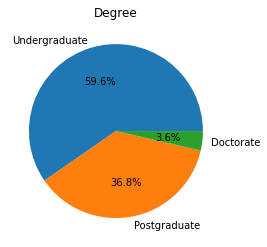

In [ ]:
plt.pie([133,82,8],labels=['Undergraduate','Postgraduate','Doctorate'], autopct='%1.1f%%')
plt.title("Degree")
plt.show()

In [ ]:
data1['Gender'].value_counts()

Male      174
Female     49
Name: Gender, dtype: int64

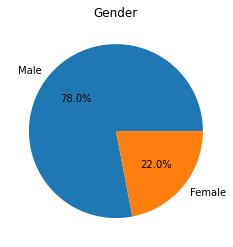

In [ ]:
plt.pie([174,49],labels=['Male','Female'], autopct='%1.1f%%')
plt.title("Gender")
plt.show()

In [ ]:
data1.iloc[:,3].value_counts()

Rarely        96
Moderate      83
Very often    38
Never          6
Name: Internet connectivity issues, dtype: int64

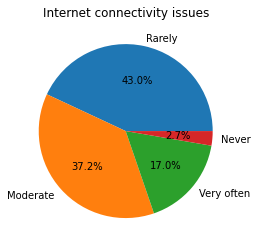

In [ ]:
plt.pie([96,83,38,6],labels=['Rarely','Moderate','Very often','Never'], autopct='%1.1f%%')
plt.title('Internet connectivity issues')
plt.show()

In [ ]:
data1.iloc[:,4].value_counts()

Urban    150
Rural     73
Name: Area, dtype: int64

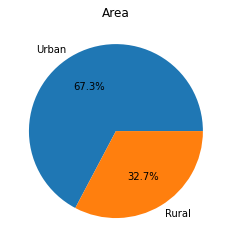

In [ ]:
plt.pie([150,73],labels=['Urban','Rural'], autopct='%1.1f%%')
plt.title('Area')
plt.show()

In [ ]:
data1.iloc[:,5].value_counts()

Live Session, Recorded Videos, Doubt sessions    82
Live Session                                     49
Live Session, Recorded Videos                    36
Recorded Videos, Live Session                    22
Recorded Videos, Doubt Session, Live Session     18
Recorded Videos                                   6
Live Session, Doubt sessions                      4
Doubt sessions                                    2
Recorded Videos, Doubt sessions                   2
Doubt Session, Live Session                       2
Name: Lecture Modes, dtype: int64

In [ ]:
data1.iloc[:,6].value_counts()

Moderate     96
Good         66
Bad          32
Very bad     15
Very good     7
Very Bad      4
Very Good     3
Name: Online learning content quality, dtype: int64

In [ ]:
data1.iloc[:,7].value_counts()

Most    113
Few     107
None      3
Name: Class interaction with instructors, dtype: int64

In [ ]:
data1.iloc[:,8].value_counts()

Few     113
None     66
Most     44
Name: Personalized Interaction with instructors, dtype: int64

In [ ]:
data1.iloc[:,9].value_counts()

Low         130
Moderate     80
High         13
Name: Level of interaction with your batchmates?, dtype: int64

In [ ]:
data1.iloc[:,10].value_counts()

2    63
1    62
3    54
4    33
5    11
Name: Motivation, dtype: int64

In [ ]:
data1.iloc[:,11].value_counts()

3    71
2    56
1    53
4    32
5    11
Name: Work-life balance, dtype: int64

In [ ]:
data1.iloc[:,12].value_counts()

Quiet    113
Noisy    110
Name: Study environment, dtype: int64

In [ ]:
data1.iloc[:,13].value_counts()

4    77
5    53
3    50
2    32
1    11
Name: Stress levels, dtype: int64

In [ ]:
data1.iloc[:,14].value_counts()

Moderate    102
Bad          72
Good         49
Name: Online examination experience, dtype: int64

In [ ]:
data1.iloc[:,15].value_counts()

8.0     40
6.0     29
10.0    28
5.0     25
4.0     25
3.0     20
7.0     19
2.0     13
9.0     11
1.0      5
4.5      2
11.0     2
2.5      2
0.5      1
5.5      1
Name: Study hours, dtype: int64

In [ ]:
data1.iloc[:,16].value_counts()

7.5    22
7.6    19
8.0    18
7.8    15
7.4    14
8.1    13
7.2    13
7.3    12
7.7    12
7.9    10
8.6     8
7.0     8
6.8     6
6.9     6
6.7     5
7.1     5
8.2     5
6.4     4
8.8     4
8.5     4
8.4     4
8.7     3
6.6     3
6.3     2
6.5     2
8.9     2
8.3     2
6.1     1
9.0     1
Name: grades, dtype: int64

### Visualization plots

(array([ 3.,  9., 17., 26., 48., 46., 41., 11., 15.,  7.]),
 array([6.1 , 6.39, 6.68, 6.97, 7.26, 7.55, 7.84, 8.13, 8.42, 8.71, 9.  ]),
 <a list of 10 Patch objects>)

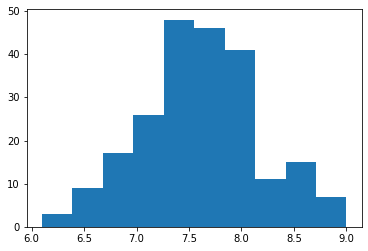

In [ ]:
# Grades
plt.hist(data1['grades'],bins=10)

(array([ 6., 15., 20., 27., 26., 29., 19., 40., 11., 30.]),
 array([ 0.5 ,  1.55,  2.6 ,  3.65,  4.7 ,  5.75,  6.8 ,  7.85,  8.9 ,
         9.95, 11.  ]),
 <a list of 10 Patch objects>)

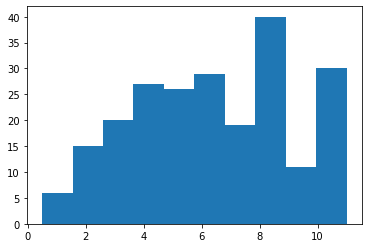

In [ ]:
#Study hours 
plt.hist(data1['Study hours'],bins=10)

In [ ]:
cols =  ['grades','Study hours']

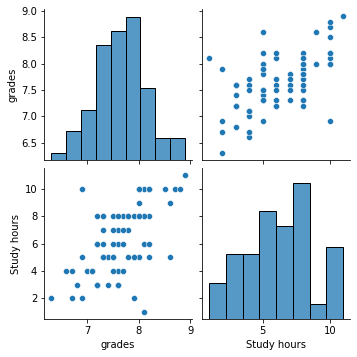

In [ ]:
#Comparison of numerical attributes for postgraduates
sns.pairplot(data1[data1['Degree'] == 'Postgraduate' ].loc[:,cols])

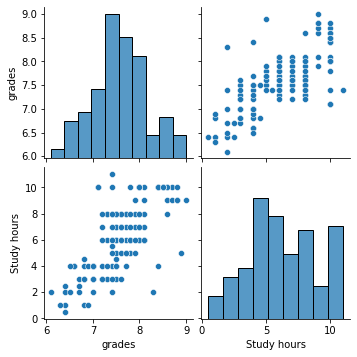

In [ ]:
#Comparison of numerical attributes for undergraduates
sns.pairplot(data1[data1['Degree'] == 'Undergraduate' ].loc[:,cols])

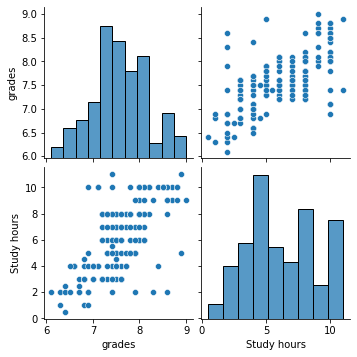

In [ ]:
#Comparison of numerical attributes of Male responses
sns.pairplot(data1[data1['Gender'] == 'Male' ].loc[:,cols])

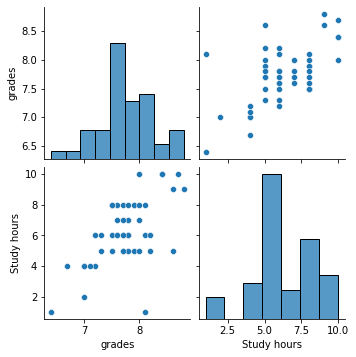

In [ ]:
#Comparison of numerical attributes for Female responses
sns.pairplot(data1[data1['Gender'] == 'Female' ].loc[:,cols])

In [ ]:
grades = list(data1[data1['Area'] == 'Urban']['grades'])
grades.sort()

mid = len(grades) // 2
grades1 = grades[mid:]
mid = len(grades1) // 2
res = (grades1[mid] + grades1[~mid]) / 2

In [ ]:
res

8.0

In [ ]:
min(data1[data1['Area'] == 'Urban']['grades'])

6.4

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


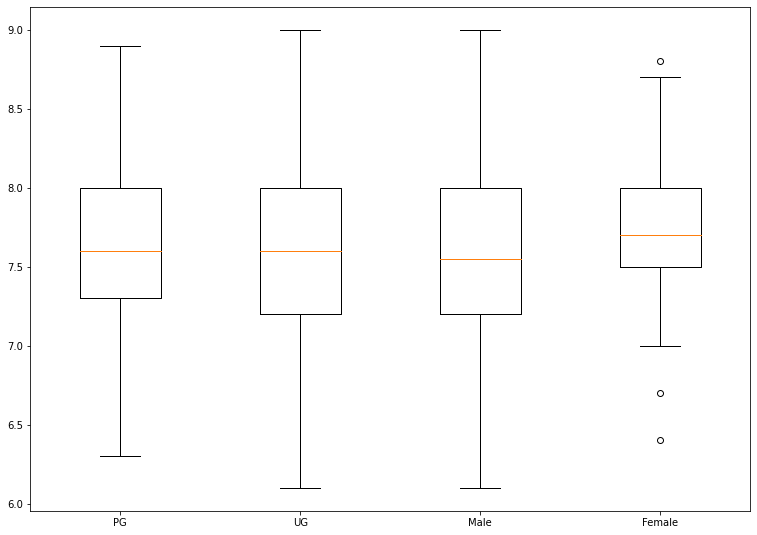

In [ ]:
#Box plot to analyse grades of different categories

data_1 = data1[data1['Degree'] == 'Postgraduate']['grades']
data_2 = data1[data1['Degree'] == 'Undergraduate']['grades']
data_3 = data1[data1['Gender'] == 'Male']['grades']
data_4 = data1[data1['Gender'] == 'Female']['grades']
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,labels = ['PG','UG','Male','Female'])
 
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


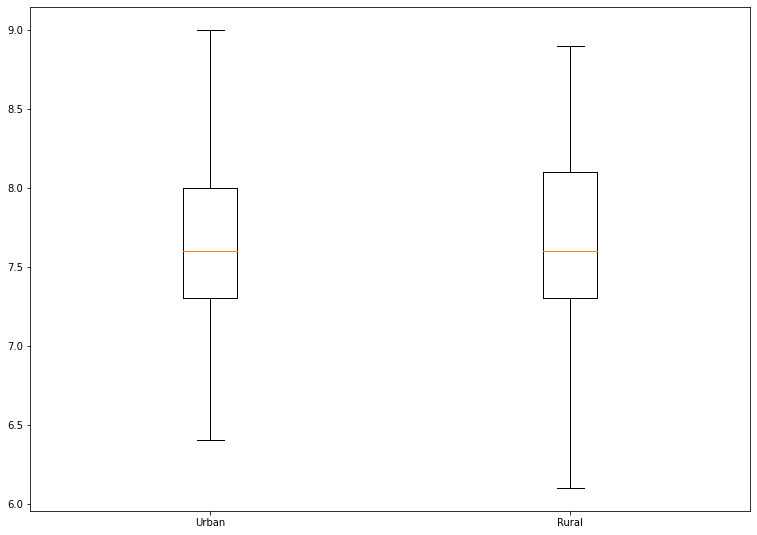

In [ ]:
#How area location affects grades

data_1 = data1[data1['Area'] == 'Urban']['grades']
data_2 = data1[data1['Area'] == 'Rural']['grades']

data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
# Creating plot
bp = ax.boxplot(data,labels = ['Urban','Rural'])
 
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


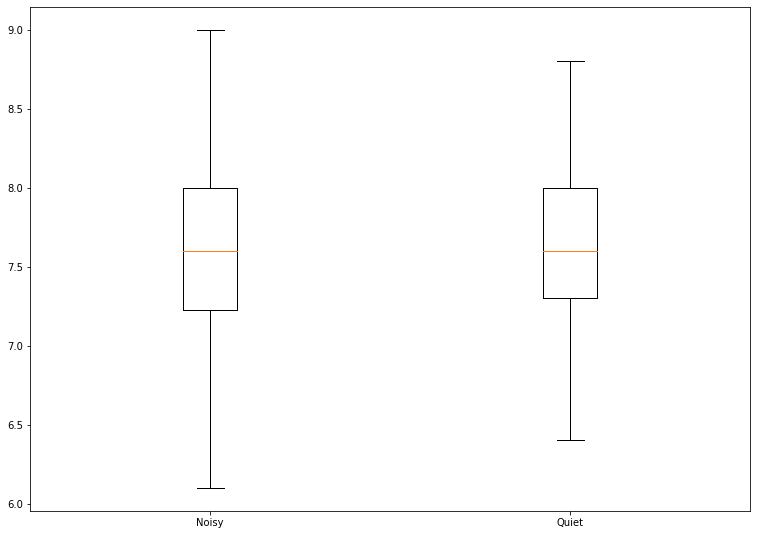

In [ ]:
#How area location affects grades

data_1 = data1[data1['Study environment'] == 'Noisy']['grades']
data_2 = data1[data1['Study environment'] == 'Quiet']['grades']

data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
# Creating plot
bp = ax.boxplot(data,labels = ['Noisy','Quiet'])
 
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


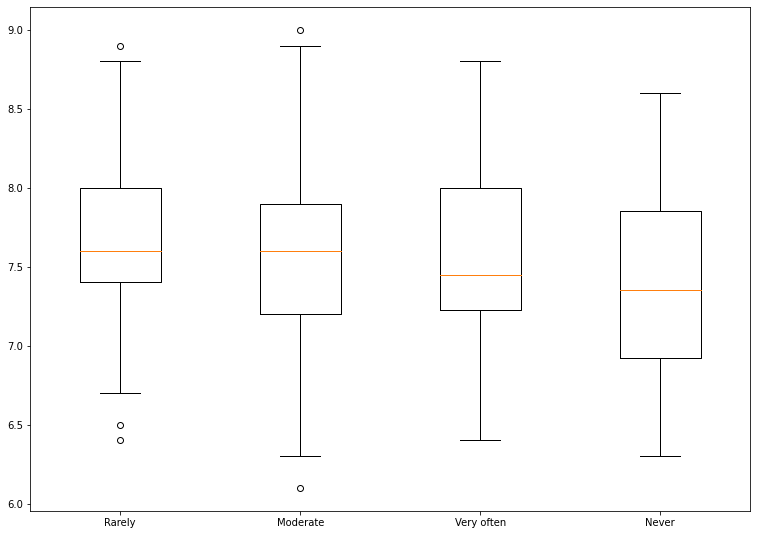

In [ ]:
#How Internet Connectivity affects grades

data_1 = data1[data1['Internet connectivity issues'] == 'Rarely']['grades']
data_2 = data1[data1['Internet connectivity issues'] == 'Moderate']['grades']
data_3 = data1[data1['Internet connectivity issues'] == 'Very often']['grades']
data_4 = data1[data1['Internet connectivity issues'] == 'Never']['grades']

data = [data_1, data_2,data_3,data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
# Creating plot
bp = ax.boxplot(data,labels = ['Rarely','Moderate','Very often','Never'])
 
# show plot
plt.show()

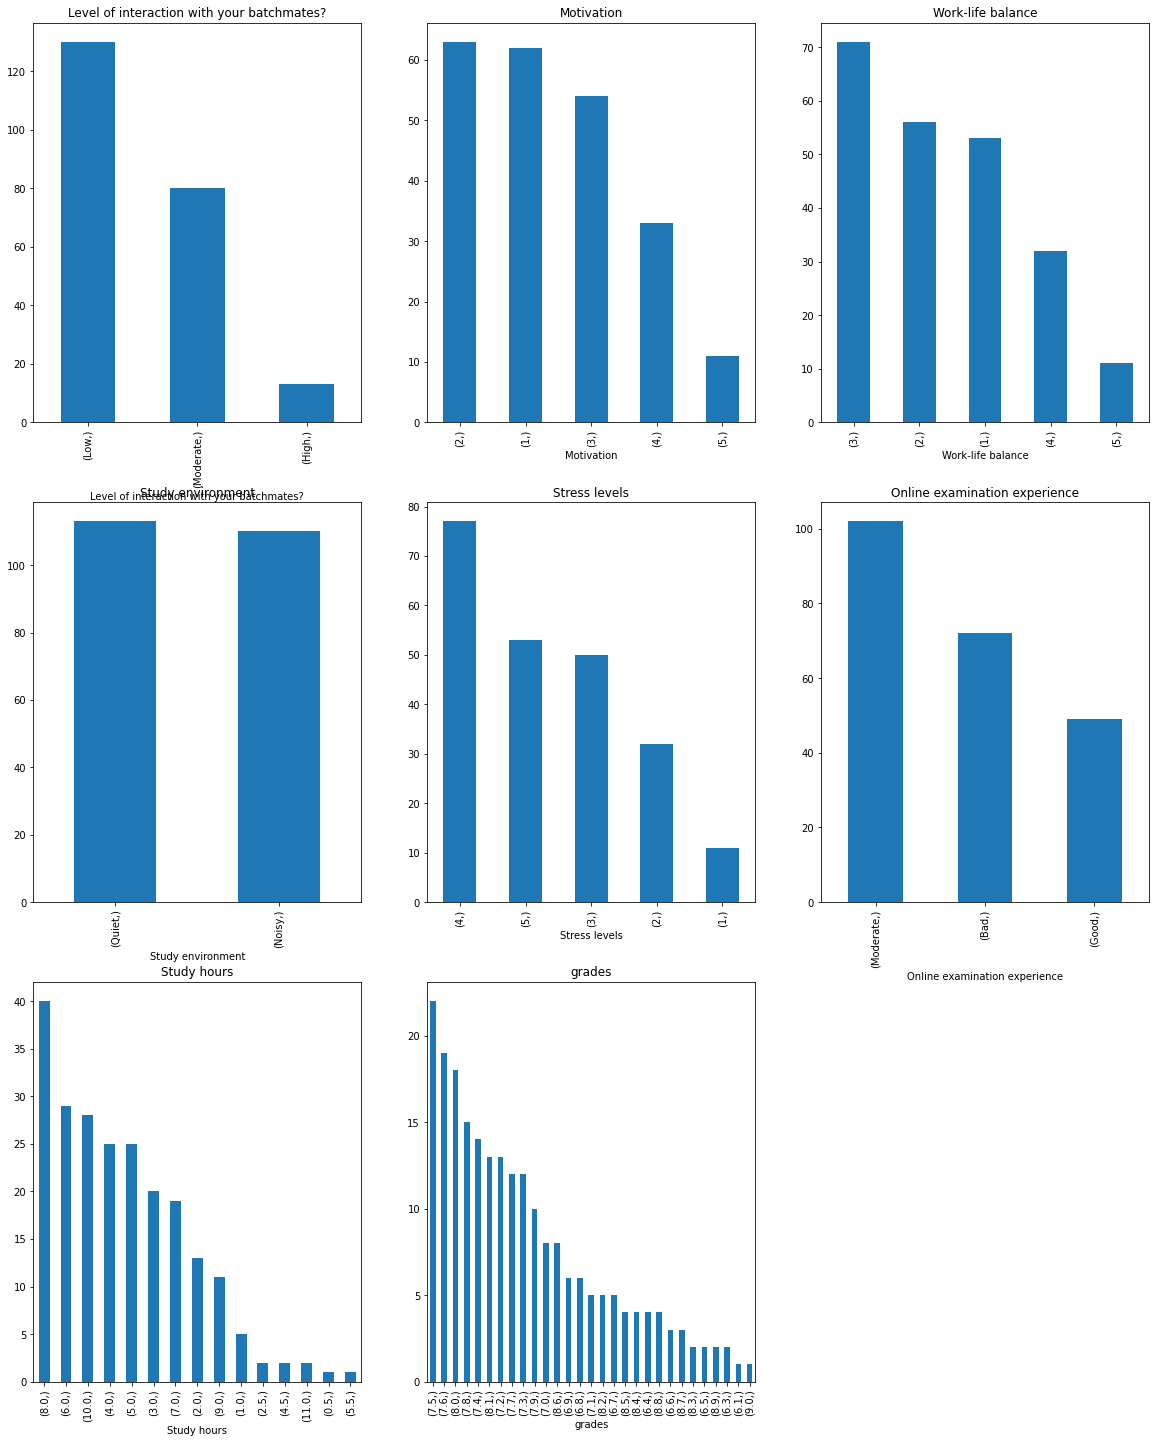

In [ ]:
w=20
h=25

fig = plt.figure(figsize=(w, h))
columns = 3
rows = 3
i=1
for col in data1.columns[9:]:
    column = data1[[col]]
    fig.add_subplot(rows, columns, i)
    i+=1
    plt.title(col)
    column.value_counts().plot(kind='bar')
plt.show()

In [ ]:
##Stacked bar charts

In [ ]:
data['Live Session'] = data['Lecture Modes'].str.contains("Live")
data['Doubt sessions'] = data['Lecture Modes'].str.contains("Doubt")
data['Recorded Videos'] = data['Lecture Modes'].str.contains("Recorded")

data.drop(columns='Lecture Modes', inplace=True)

TypeError: ignored

In [ ]:
#Measures of central tendency, Measures of skewness, Measures of dispersion
#Proving chebyshev's theorem
#Z-score hypothesis
#Visualization - one categorical variable- pie chart, bar chart; two categorical variable - contingency table, Numerical variable + categorical variable - box plot, one numerical variable - histogram; two numerical variables: scatter plot
# Work life balance of undergrads vs postgrads
#Analyse the plots
#Graphs between various features
#Central limit theorem using grades
#Hypothesis testing 
#difference in means of two proportions


## Central Limit theorem verification




In [ ]:
import random

In [ ]:
grades = data1['grades']

In [ ]:
grades = list(grades)

In [ ]:
def clt(grades,n):
  sample_mean = []
  for i in range(1000):
    indexes = random.sample(range(0,len(grades)),n)
    sample_list = []
    for j in indexes:
      sample_list.append(grades[j])
    sample_mean.append(sum(sample_list)/len(sample_list))
  return sample_mean

(array([  7.,  13.,  49., 141., 226., 233., 198.,  89.,  37.,   7.]),
 array([7.01 , 7.125, 7.24 , 7.355, 7.47 , 7.585, 7.7  , 7.815, 7.93 ,
        8.045, 8.16 ]),
 <a list of 10 Patch objects>)

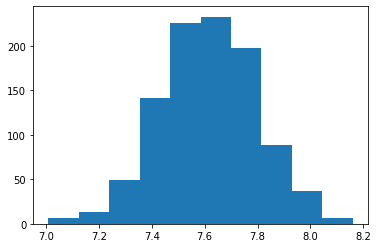

In [ ]:
#N=30
sample_mean = clt(grades,10)
plt.hist(sample_mean,bins=10)

(array([  4.,  10.,  16.,  47.,  71.,  97., 151., 141., 157., 103.,  92.,
         57.,  31.,  16.,   7.]),
 array([7.25 , 7.298, 7.346, 7.394, 7.442, 7.49 , 7.538, 7.586, 7.634,
        7.682, 7.73 , 7.778, 7.826, 7.874, 7.922, 7.97 ]),
 <a list of 15 Patch objects>)

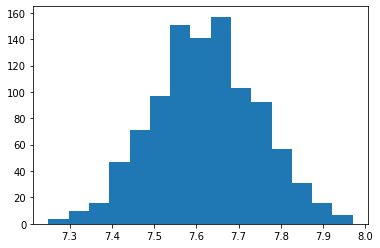

In [ ]:
#N>30
sample_mean = clt(grades,20)
plt.hist(sample_mean,bins = 15)

(array([  2.,   7.,   8.,  11.,  24.,  64.,  72., 108., 115., 112., 141.,
        117.,  94.,  54.,  33.,  20.,  12.,   3.,   1.,   2.]),
 array([7.30666667, 7.339     , 7.37133333, 7.40366667, 7.436     ,
        7.46833333, 7.50066667, 7.533     , 7.56533333, 7.59766667,
        7.63      , 7.66233333, 7.69466667, 7.727     , 7.75933333,
        7.79166667, 7.824     , 7.85633333, 7.88866667, 7.921     ,
        7.95333333]),
 <a list of 20 Patch objects>)

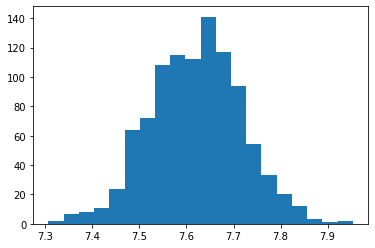

In [ ]:
#N>>>30
sample_mean = clt(grades,30)
plt.hist(sample_mean,bins =20)

##Sampling distribution of sample mean when variance is known

In [ ]:
def sample_mean_variance(grades,n):
  sample_mean = []
  sample_variance = []
  for i in range(n):
    indexes = random.sample(range(0,len(grades)),100)
    sample_list = []
    for j in indexes:
      sample_list.append(grades[j])
    mean = sum(sample_list)/len(sample_list)
    sample_mean.append(mean)
    variance = 0
    for i in sample_list:
      variance += (i-mean)**2
    variance /= (100-1)
    sample_variance.append(variance)
    
  return sample_mean,sample_variance

sample_mean,sample_variance = sample_mean_variance(list(data1['grades']),400)

In [ ]:
population_mean = data1['grades'].mean()
population_mean

In [ ]:
t_values = []
for i in range(len(sample_mean)):
  value = (sample_mean[i] - population_mean)*(len(sample_mean))**1/2
  value /= sample_variance[i]
  t_values.append(value)


In [ ]:
plt.hist(t_values,bins=20)

## MOM and MLE of parameters of grades distribution

In [ ]:
def MLE(sample):
  log_likelihood = lambda rate: sum([np.log(norm.pdf(v, scale=rate)) for v in sample])
  rates = np.arange(1, 8, 0.01)
  estimates = [log_likelihood(r) for r in rates]

  plt.xlabel('parameter')
  plt.plot(rates, estimates)
  return rates[estimates.index(max(estimates))]

In [ ]:
mean_mle = MLE(grades)
print('Maximum Likelihood Estimate of Mean: ', mean_mle)
variance_mle = (np.sum((grades - mean_mle)**2))/len(grades)
print('Maximum Likelihood Estimate of Variance : ', variance_mle)

In [ ]:
sample_mean = np.mean(grades)
mean_mme = sample_mean

#Comparing the Second moments

variance_mme = np.sum(np.square(grades))/len(grades) - mean_mme**2

print('Method of Moments Estimate of Mean: ', mean_mme)
print('Method of Moments Estimate of Variance: ', variance_mme)

## Hypothesis testing

In [ ]:
def categoricalDependencyTest(row, *columns):
    #temp_data = pd.crosstab(index=row, columns=list(columns), dropna=False)
    temp_data = pd.crosstab(index=row, columns=list(columns))
    print(tabulate(temp_data, headers='keys', tablefmt='plain'))
    #print(temp_data.to_numpy())
    output = chi2_contingency(temp_data.to_numpy())
    #print(output)
    print(output[0])
    alpha = 0.05
    if output[1] <= alpha:
        print("Dependent (Null Hypothesis is rejected).")
    else:
        print("Independent (Null Hypothesis holds True).")

In [ ]:
#categoricalDependencyTest(data1['Online examination experience'], data1['Online learning content quality'], data1['Motivation'])
categoricalDependencyTest(data1['Area'], data1['Internet connectivity issues'])

In [ ]:
categoricalDependencyTest(data1['Online examination experience'], data1['Motivation'])

In [ ]:
#categoricalDependencyTest(data1['Level of interaction with your batchmates?'], data1['Stress levels'])
#categoricalDependencyTest(data1['Degree'], data1['Work-life balance'])
categoricalDependencyTest(data1['Study environment'], data1['Stress levels'])

In [ ]:
#categoricalDependencyTest(data1['Degree'], data1['Motivation'])
categoricalDependencyTest(data1['Online examination experience'], data1['Online learning content quality'])

In [ ]:
categoricalDependencyTest(data1['Online examination experience'], data1['Study hours'])

In [ ]:
categoricalDependencyTest(data1['Motivation'], data1['Level of interaction with your batchmates?'])

In [ ]:
#categoricalDependencyTest(data1['Online examination experience'], data1['Personalized Interaction with instructors'])
categoricalDependencyTest(data1['Motivation'], data1['Online learning content quality'], data1['Personalized Interaction with instructors'])

In [ ]:
categoricalDependencyTest(data1['Stress levels'], data1['Online learning content quality'], data1['Personalized Interaction with instructors'])

## Confidence Interval for Population Mean (with 95% of confidence level)

In [ ]:
sample_mean = data1['grades'].mean()
sample_var = data1['grades'].var()
n = len(data1['grades'])
alpha = 0.05

In [ ]:
t_value = 1.971

In [ ]:
error_margin = (t_value * sample_var) / np.sqrt(n)

In [ ]:
error_margin

0.04442111036103311

In [ ]:
lower_bound = sample_mean - error_margin
upper_bound = sample_mean + error_margin

In [ ]:
lower_bound

7.575721399909758

In [ ]:
upper_bound

7.665350028661669

Tests of the Equality of Two Means

In [ ]:
s1 = data1[['Stress levels', 'grades']][data1['Stress levels'] < 3]
s2 = data1[['Stress levels', 'grades']][data1['Stress levels'] >= 3]

var1 = s1['Stress levels'].var()
var2 = s2['Stress levels'].var()

print(var1, var2)

0.19490586932447393 0.5751396648044705


In [ ]:
s1 = data1[data1["Internet connectivity issues"]=="Very often"]

In [ ]:
s1 = s1["grades"]

In [ ]:
s2 = data1[data1["Internet connectivity issues"]!="Very often"]

In [ ]:
s2 = s2["grades"]

In [ ]:
mean1 = np.mean(s1)

In [ ]:
mean2 = np.mean(s2)

In [ ]:
d = mean2 - mean1

In [ ]:
d

0.03477951635846388

In [ ]:
s_var1 = s1.var()
s_var2 = s2.var()
s_var1/s_var2

1.2212657886669906

In [ ]:
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)

In [ ]:
r = len(s1) + len(s2) - 2

In [ ]:
r

221

In [ ]:
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

1.699468914533256

In [ ]:
1.65177768

1.65177768

1.65 < 1.699 we will reject null hypothesis (= diff of mean<0)

Grades of people facing less connectivity issue - Grades of people facing more connectivity issue < 0 is not rejected

Grades of people facing less connectivity issue is more than Grades of people facing more connectivity issue

In [ ]:
s1 = data1[data1["Study environment"]=="Noisy"]
s1 = s1["grades"]

In [ ]:
s2 = data1[data1["Study environment"]=="Quiet"]
s2 = s2["grades"]

In [ ]:
mean1 = np.mean(s1)
mean2 = np.mean(s2)

In [ ]:
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2

1.2983586906479299

In [ ]:
d = mean2 - mean1

In [ ]:
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)

In [ ]:
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

5.0020998051148515

1.65177768 < 5.0020998051148515

We rejected Null hypothesis

Students studying in Quiet Environment are having more grades than those studying in noisy environment.

In [ ]:
s1 = data1[data1["Online examination experience"] == 'Bad']
s1 = s1["grades"]

In [ ]:
s2 = data1[data1["Online examination experience"] != 'Bad']
s2 = s2["grades"]

In [ ]:
mean1 = np.mean(s1)
mean2 = np.mean(s2)

In [ ]:
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2

0.7434752769168766

In [ ]:
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)

In [ ]:
d = mean2 - mean1

In [ ]:
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

17.96666247245709

1.65177768 < 17.96666247245709

We reject Null Hypothesis

Grades of students with Online Examination experience with values ['Good', 'Moderate'] is better than those with ['Bad'] online examination experience.

In [ ]:
s1 = data1[data1["Stress levels"] > 3]
s1 = s1["grades"]

In [ ]:
s2 = data1[data1["Stress levels"] <= 3]
s2 = s2["grades"]

In [ ]:
mean1 = np.mean(s1)
mean2 = np.mean(s2)
print(mean1, mean2)

7.68076923076923 7.524731182795701


In [ ]:
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2

1.1145204831259854

In [ ]:
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)

In [ ]:
d = mean2 - mean1

In [ ]:
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

-10.57506861813271

1.65177768 > -10.57506861813271

We fail to reject Null Hypothesis

Students with stress levels less than or equal to 3 have lower grades than those with higher stress levels

In [ ]:
s1 = data1[data1["Study hours"] <= 5]
s1 = s1["grades"]
s2 = data1[data1["Study hours"] > 5]
s2 = s2["grades"]

In [ ]:
mean1 = np.mean(s1)
mean2 = np.mean(s2)
print(mean1, mean2)
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)
d = mean2 - mean1
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

7.26989247311828 7.863076923076924


67.443732341624

1.65177768 < 67.443732341624

We reject Null Hypothesis

Students who study more than 5 hours have more grades than other students.

In [ ]:
s1 = data1[data1["Motivation"] <= 3]
s1 = s1["grades"]
s2 = data1[data1["Motivation"] > 3]
s2 = s2["grades"]
mean1 = np.mean(s1)
mean2 = np.mean(s2)
print(mean1, mean2)
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)
d = mean2 - mean1
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

7.554748603351956 7.863636363636365


17.5974853794516

1.65177768 < 17.5974853794516

We reject Null Hypothesis

Students with motivation level more than 3 have more grades than other students with lesser motivation levels.

In [ ]:
options = ['Bad', 'Very Bad']
s1 = data1[data1["Online learning content quality"].isin(options)]
s1 = s1["grades"]
s2 = data1[~data1["Online learning content quality"].isin(options)]
s2 = s2["grades"]
mean1 = np.mean(s1)
mean2 = np.mean(s2)
print(mean1, mean2)
s_var1 = np.var(s1)
s_var2 = np.var(s2)
s_var1/s_var2
sp = ((len(s1) - 1) * s_var1 ** 2 + (len(s2) - 1) * s_var2 ** 2) / ( len(s1) + len(s2) - 2)
d = mean2 - mean1
d/(sp * np.sqrt((1/len(s1)) + (1/(len(s2)))))

7.411764705882351 7.676162790697673


15.853325904030104

1.65177768 < 15.853325904030104

We reject Null Hypothesis.

Students who believe Online learning quality as ['Bad', 'Very Bad'] have lesser grades than those who think just opposite.